In [125]:
## plot the histogram showing the modeled and labeled result 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [107]:
# read data 
ty  = ['EQS','EQP','SUS','SUP','THS','THP','SNS','SNP','PXS','PXP']
wave = {}
for t in ty:
    wave[t] = {}
    wave[t]['correct'] = []
    wave[t]['wrongphase'] = []
    wave[t]['miss'] = 0
    wave[t]['multiphase'] = []   
                            

In [110]:
wave['EQS']

{'correct': [], 'wrongphase': [], 'miss': 0, 'multiphase': []}

In [150]:
def read_comp(file):
    Pwave = {}
    Pwave['correct'] = []
    Pwave['wrongphase'] = []
    Pwave['miss'] = 0
    Pwave['multiphase'] = []    
    
    with open(file, 'r') as comp:
         for line in comp:
            pickline = line.split(' ')
            if pickline[0].strip()[-1] == 'P' and pickline[1].strip() == 'P' and len(pickline)==3:
                Pwave['correct'].append(float(pickline[2][:-2]))
            if pickline[0].strip()[-1] == 'P' and pickline[1].strip() != 'P' and pickline[1].strip() != 'N':
                Pwave['wrongphase'].append (float(pickline[2][:-2]))
            if pickline[0].strip()[-1] == 'P' and pickline[1].strip() == 'P' and len(pickline)>3:  
                Pwave['multiphase'].append(len(pickline)-2)
            if pickline[0].strip()[-1] == 'P' and pickline[1].strip() == 'N':
                Pwave['miss'] +=1
     
    
    
    return Pwave

In [ ]:
for name in tp:
    test = read_comp('../'+name+'.out')

In [151]:
t = 'comparison'
test = read_comp('../'+t+'.out')
test

{'correct': [0.0996,
  0.0195,
  0.0,
  0.8968,
  0.0975,
  0.5011,
  0.8989,
  0.7997,
  0.0,
  4.499,
  2.2975,
  0.5995,
  0.1992,
  0.6977,
  0.0013,
  0.2978,
  0.2008,
  0.1976,
  0.6997,
  0.1976,
  0.7985,
  0.5976,
  0.9,
  0.9094,
  0.8086,
  1.0,
  2.2017,
  3.6004,
  2.2003,
  2.1004,
  2.002,
  2.0,
  1.8026,
  0.0004,
  2.1014,
  2.0027,
  1.9013,
  1.2993,
  2.402,
  2.0002,
  0.8013,
  2.0,
  1.3008,
  1.0013,
  1.9013,
  1.0003,
  0.5995,
  1.9,
  2.0001,
  1.4003,
  1.502,
  2.902,
  3.3019],
 'wrongphase': [0.695,
  0.0,
  0.2023,
  0.0,
  1.3027,
  0.3997,
  2.4015,
  0.7,
  0.4005,
  0.3002,
  0.18,
  2.4986,
  2.198,
  2.601,
  0.298,
  0.0,
  1.2016,
  0.1019,
  0.2002,
  0.3008,
  0.019,
  4.0005,
  0.502,
  1.1001,
  2.019,
  1.401,
  2.3018,
  3.581,
  2.2197,
  1.914,
  2.8028,
  2.0007,
  2.3006,
  2.5014,
  2.7002,
  1.9015,
  0.798,
  1.0,
  1.0006,
  2.0,
  2.101,
  1.7002,
  4.6015,
  2.7025,
  2.799,
  1.7],
 'miss': 63,
 'multiphase': [2, 2, 3, 2, 2]}

No handles with labels found to put in legend.


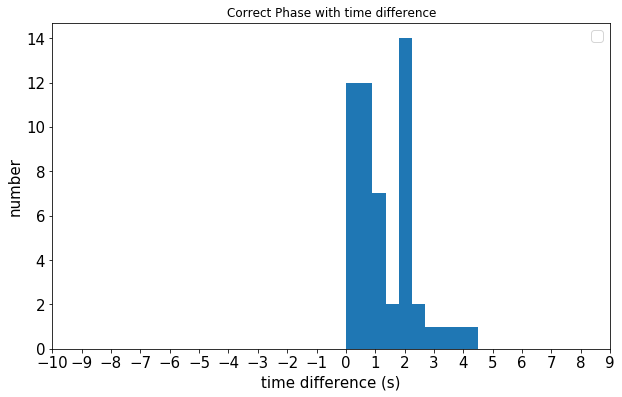

In [152]:
# plot histogram of the correct plot 
fig, ax = plt.subplots(figsize = (10,6))

fig = plt.hist(test['correct'],bins= 10)
ax.set_ylabel('number', fontsize=15)
ax.set_xlabel('time difference (s)', fontsize=15)
ax.set_title('Correct Phase with time difference')
plt.xticks(fontsize=15)
#plt.xticks( rotation='vertical')
plt.xticks(np.arange(-10, 10, step=1))
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('test.jpg')

No handles with labels found to put in legend.


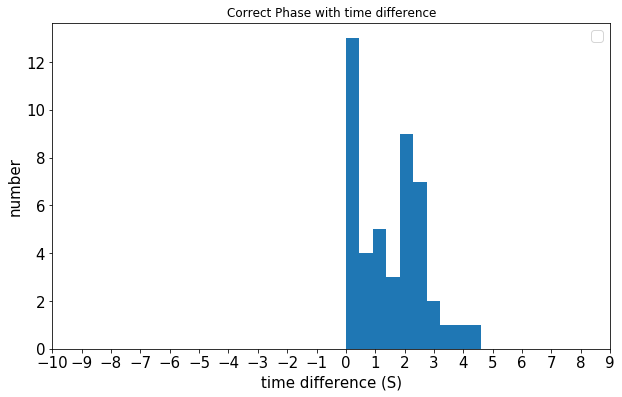

In [154]:
# plot histogram of the wrongphase plot 
fig, ax = plt.subplots(figsize = (10,6))

#k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)
fig = plt.hist(test['wrongphase'])
ax.set_ylabel('number', fontsize=15)
ax.set_xlabel('time difference (S)', fontsize=15)
ax.set_title('Correct Phase with time difference')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(-10, 10, step=1))
plt.legend(fontsize=15)

No handles with labels found to put in legend.


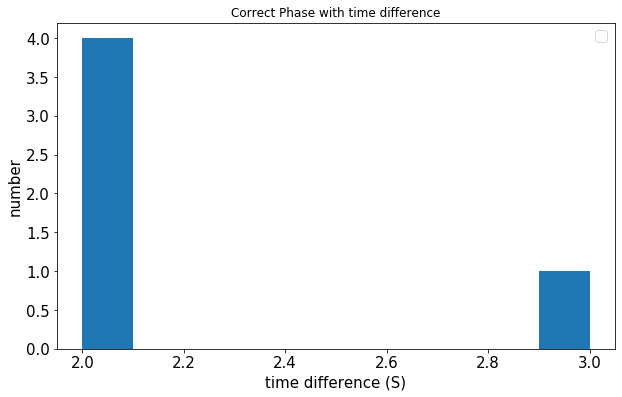

In [155]:
# plot histogram of the wrongphase plot 
fig, ax = plt.subplots(figsize = (10,6))
#k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)
fig = plt.hist(test['multiphase'])
ax.set_ylabel('number', fontsize=15)
ax.set_xlabel('time difference (S)', fontsize=15)
ax.set_title('Correct Phase with time difference')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xticks(np.arange(-10, 10, step=1))
plt.legend(fontsize=15)

In [87]:
comp = pd. read_csv('../comparison.out', names=['type','mod_type','time'],sep = ' ')
comp.head()                   

,type,mod_type,time
0,EQS,N,NaN
1,EQP,N,NaN
2,EQS,N,NaN
3,EQP,N,NaN
4,EQS,N,NaN


In [91]:
comp['mod_type'].value_counts()

N    76767
P       58
S       47
Name: mod_type, dtype: int64

In [137]:
comp['time'][comp['type']=='THP'].describe()

count    104.000000
mean       1.415390
std        1.072226
min        0.000470
25%        0.500750
50%        1.301450
75%        2.101310
max        4.601530
Name: time, dtype: float64

In [139]:
comp = pd. read_csv('../comparison.out', sep = '/s+')
comp.head()  

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,EQS N nan
0,EQP N nan
1,EQS N nan
2,EQP N nan
3,EQS N nan
4,EQP N nan


In [148]:
with open('../comparison.out', 'r') as comp:
    leng = []
    for line in comp:
        pickline = line.split(' ')
        leng.append(len(pickline))

In [149]:
max(leng)

6